In [1]:
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

import fof

In [17]:
# create the arrays
pdt = np.dtype([('pos','f4', 3), ('iGroup', 'i4'), ('iOrder', 'i4')])
nps = 100000
ngs = 5
particles = np.zeros(nps, dtype=pdt)
done_ps = 0
centers = np.random.rand(ngs,3)*2 - 1
for group, center in zip(range(ngs), centers): 
    group_ps = nps/ngs
    if nps - (done_ps + group_ps) < group_ps:
        group_ps = nps - done_ps 
    particles['pos'][done_ps:done_ps+group_ps] = \
        np.random.multivariate_normal(center, [[.001,0,0],[0,.001,0],[0,0,.001]], group_ps)
    done_ps += group_ps
   
particles['iOrder'] = range(nps)

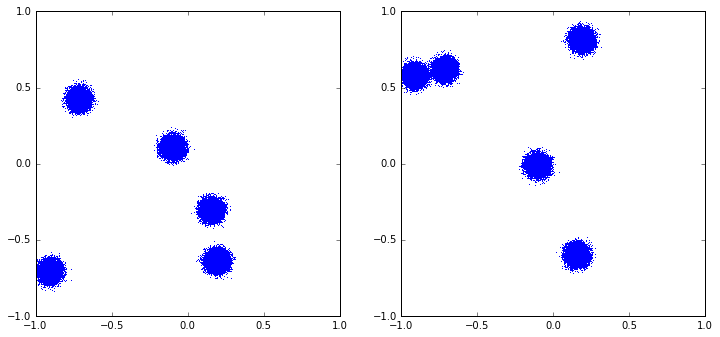

In [18]:
f, axs = plt.subplots(1,2, subplot_kw={'aspect':'equal'}, figsize=(12,12))
axs[0].plot(particles['pos'][:,0], particles['pos'][:,1], ',')
axs[1].plot(particles['pos'][:,0], particles['pos'][:,2], ',')
for ax in axs:
    ax.set_xlim(-1,1); ax.set_ylim(-1,1)

In [19]:
%time fof.run(particles, 0.1)

CPU times: user 2.61 s, sys: 1.32 ms, total: 2.61 s
Wall time: 2.61 s


5

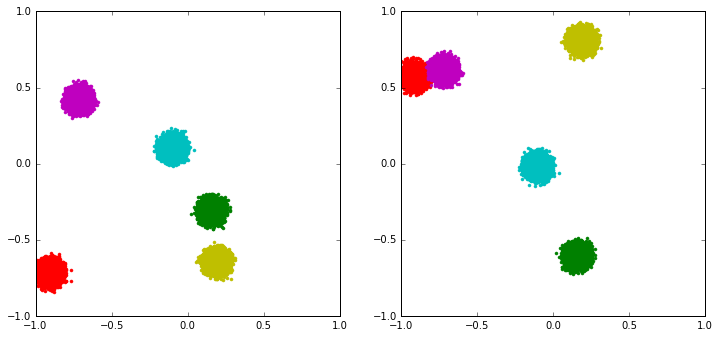

In [20]:
f, axs = plt.subplots(1,2, subplot_kw={'aspect':'equal'}, figsize=(12,12))
for group in range(ngs+1): 
    inds = np.where(particles['iGroup'] == group)[0]
    axs[0].plot(particles['pos'][inds,0], particles['pos'][inds,1], '.')
    axs[1].plot(particles['pos'][inds,0], particles['pos'][inds,2], '.')
for ax in axs:
    ax.set_xlim(-1,1); ax.set_ylim(-1,1)